# Exercício — Regressão Linear
### Importação das bibliotecas e inicialização do dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('plano_saude.csv')

## Regressão Linear Manual
### (usando cálculos de covariância, coeficientes de correlação e determinação, intersecção e inclinação)

In [2]:
def PrevisaoRegressaoLinear(x, y, v):
    x = np.array(x)
    y = np.array(y)

    cov_xy = np.corrcoef(x, y)[0, 1]
    inclinacao = cov_xy * (np.std(y)/np.std(x))
    interseccao = np.mean(y) - inclinacao * np.mean(x)
    previsao = interseccao + inclinacao * v
    return float(previsao)

### Testando a função de Regressão Linear

In [3]:
x = df['idade']
y = df['custo']

lr = PrevisaoRegressaoLinear(x, y, 54)
lr

2657.3594760672704

### Heatmap do Seaborn, mostrando correlação entre as variáveis

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

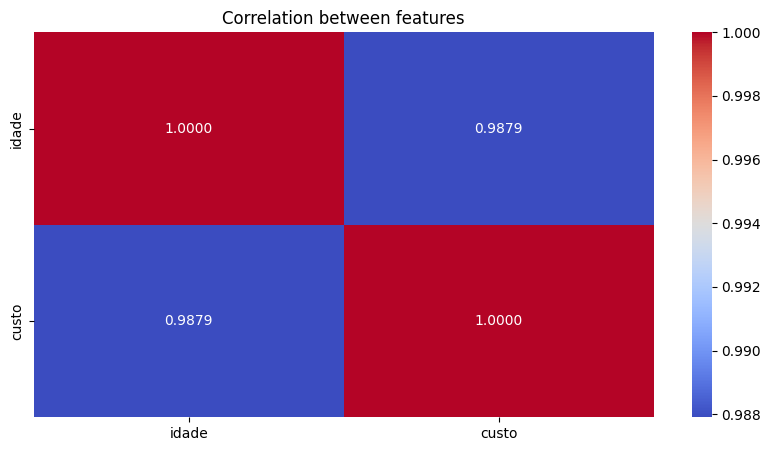

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation between features')
plt.plot

### Ajustando o formato da variável

In [4]:
x = x.values.reshape(-1, 1)
x.shape

(11, 1)

### Função fit para realizar o treinamento com o modelo de Regressão Linear

In [5]:
from sklearn.linear_model import LinearRegression
regression_plan = LinearRegression()
regression_plan.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Visualizando o valor de intersecção e a inclinação da linha

In [6]:
regression_plan.intercept_
regression_plan.coef_

array([46.45003234])

### Fazendo as previsões de Y com base nos valores de X

In [ ]:
predictions = regression_plan.predict(x)
predictions

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

### Comparando os valores reais com os previstos em um gráfico de dispersão

In [ ]:
graphic_plan = px.scatter( x = x.ravel(), y = y)
graphic_plan.add_scatter(x = x.ravel(), y = predictions, name = "Regression")
graphic_plan.show()

### Com o método **predict**, prevemos novos valores:

In [11]:
prediction_54y = regression_plan.predict([[54]])
print(f"A previsão para 54 anos é: {prediction_54y[0]:.2f}")

A previsão para 54 anos é: 2657.36


### Para verificarmos o quão bom o algoritmo se saiu na aplicação, usamos a função **score**

In [13]:
regression_plan.score(x.reshape(-1, 1), y)

0.9759542217686598